# Лабораторная работа 3.2 
Трунов Антон М8О-304Б Вариант 16

# Задание
Построить кубический сплайн для функции, заданной в узлах интерполяции 
$
x_i = \{0.1, 0.5, 0.9, 1.3, 1.7\} \\ 
f_i = \{-2.2026, -0.19315, 0.79464, 1.5624, 2.2306\}\\
i = 0,...,4,
$
предполагая, что сплайн имеет нулевую кривизну при $x=x_0$ и $x=x_4$. Вычислить значение функции в точке $x=X^*=0.8$.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]

In [11]:
x_nodes = np.array([0.0, 1.7, 3.4, 5.1, 6.8])
y_nodes = np.array([0.0, 3.0038, 5.2439, 7.3583, 9.4077])
#x_nodes = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
#y_nodes = np.array([0.0, 1.8415, 2.9093, 3.1411, 3.2432])
x_err = 3.0

In [12]:
n = x_nodes.shape[0] - 1

In [13]:
def TDMAsolver(a, b, c, d):
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

In [14]:
def c_coeff(x, y, n):
    a = np.zeros(n - 1)
    b = np.zeros(n - 1)
    c = np.zeros(n - 1)
    d = np.zeros(n - 1)
    c_coeff = np.zeros(n)
    for i in range(2, n + 1):
        a[i - 2] = x[i - 1] - x[i - 2]
        b[i - 2] = 2*(x[i] - x[i - 2])
        c[i - 2] = x[i] - x[i - 1]
        d[i - 2] = 3 * ((y[i] - y[i-1]) / (x[i] - x[i-1]) - (y[i-1] - y[i-2]) / (x[i-1] - x[i-2]))
    c_coeff[1:] = TDMAsolver(a[1:], b, c[:len(c)], d)
    return c_coeff

In [15]:
def spline_table(x, y, n):
    A = np.empty((n,4))
    c = c_coeff(x, y, n)
    for i in range(1,n):
        A[i - 1,0] = y[i - 1]
        A[i - 1,1] = (y[i] - y[i - 1])/(x[i] - x[i-1]) - (x[i] - x[i-1])*(c[i] + 2*c[i - 1])/3
        A[i - 1,2] = c[i - 1]
        A[i - 1,3] = (c[i] - c[i - 1])/(3*(x[i]-x[i-1]))
    A[n - 1,0] = y[n - 1]
    A[n-1,1] = (y[n] - y[n - 1])/(x[n] - x[n-1]) - 2*(x[n] - x[n-1])*c[n - 1]/3
    A[n - 1,2] = c[n - 1]
    A[n - 1,3] = -c[n - 1] / (3 * (x[n] - x[n - 1]))
    return A

In [16]:
def cubic_spline(A,x_nodes, y_nodes, n , x):
    f = lambda a,b,c,d,xi,x: a + b*(x - xi) + c*(x - xi)**2 + d*(x - xi)**3
    i = np.where(x >= x_nodes)[0][-1]
    return f(A[i,0], A[i,1], A[i,2], A[i,3], x_nodes[i], x)

In [17]:
A = spline_table(x_nodes, y_nodes, n)
print("Coefficients matrix:\n", A)
print("Result at X* = %s:" %x_err, cubic_spline(A, x_nodes, y_nodes, n , x_err))

Coefficients matrix:
 [[ 0.00000000e+00  1.88267332e+00  0.00000000e+00 -4.00457242e-02]
 [ 3.00380000e+00  1.53547689e+00 -2.04233193e-01  4.47838824e-02]
 [ 5.24390000e+00  1.22936029e+00  2.41646070e-02 -9.23024919e-03]
 [ 7.35830000e+00  1.23149370e+00 -2.29096639e-02  4.49209095e-03]]
Result at X* = 3.0: 4.753156051001716


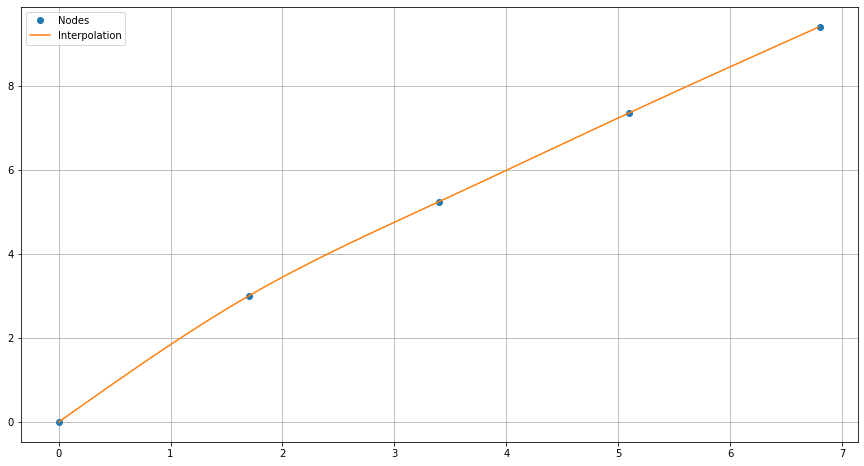

In [18]:
plt.grid()
X = np.arange(x_nodes[0], x_nodes[-1], 0.01)
P_3 = [cubic_spline(A, x_nodes, y_nodes, n , x) for x in X]
plt.plot(x_nodes,y_nodes,'o',label='Nodes')
plt.plot(X,P_3,label='Interpolation')
plt.legend()
plt.show()